In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your dataset with the correct delimiter and read as a single column
df = pd.read_csv("C:\\Users\\eduar\\OneDrive\\Documentos\\AI Engineering\\Machine Learning\\Project\\mlproject\\final_transformed_dataset.csv", sep=';', header=None)

# Split the single column into multiple columns using the semicolon delimiter
df = df[0].str.split(';', expand=True)

# Set the first row as the header
df.columns = df.iloc[0]
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Convert data to numeric where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Display shape and first few rows of the DataFrame
print("DataFrame shape:", df.shape)
print(df.head())


DataFrame shape: (22, 11)
0  Wall area (m2)  Inner walls area (m2)  Roof area (m2)  \
0              80                      0             185   
1             270                     50             110   
2             272                     55             158   
3             207                     25             185   
4             100                     25             140   

0  Floor area 2nd floor (m2)  Number of windows std size  \
0                        0.0                           8   
1                       72.0                           7   
2                       77.0                           8   
3                      128.0                          16   
4                        0.0                           2   

0  Number of windows >18 height  Number of sliding doors  \
0                             1                        1   
1                            22                        1   
2                            14                        0   
3           

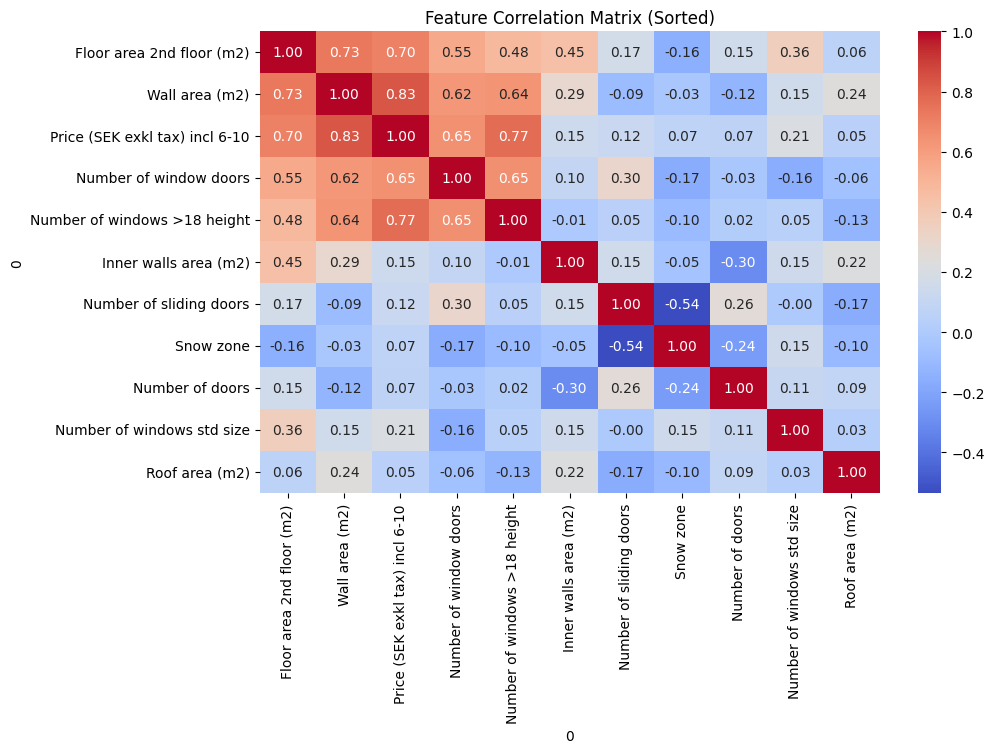

In [6]:
# Compute correlation matrix
corr_matrix = df.corr()

# Sort columns and rows by highest absolute correlation values
corr_order = corr_matrix.abs().sum().sort_values(ascending=False).index
sorted_corr_matrix = corr_matrix.loc[corr_order, corr_order]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix (Sorted)")
plt.show()

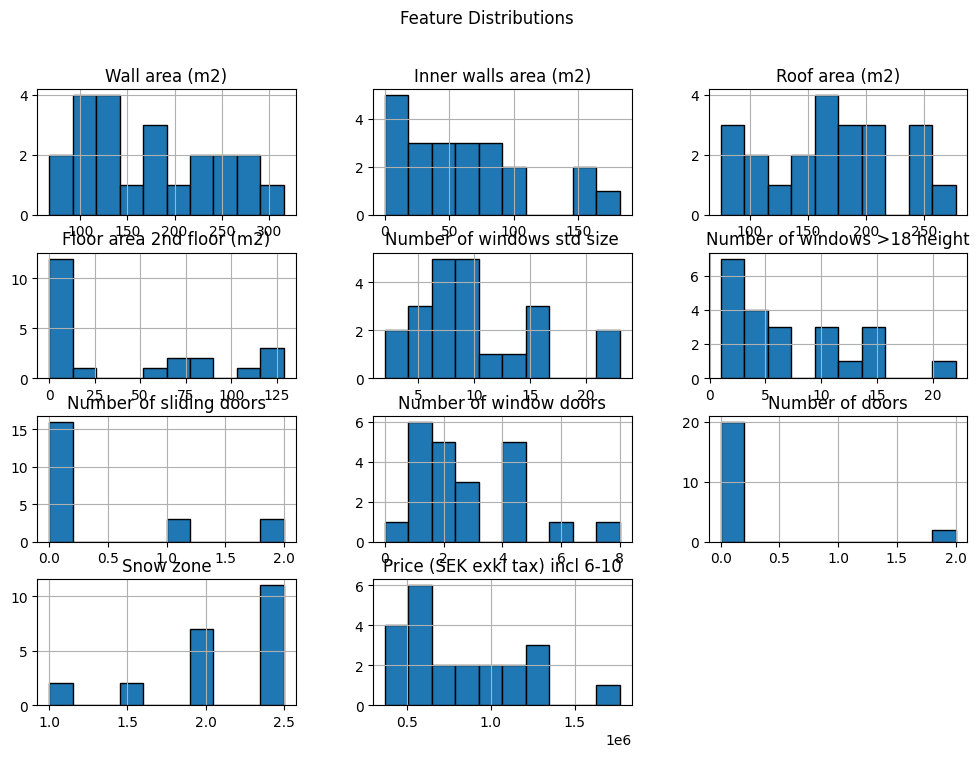

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns
if numeric_cols.empty:
    print("No numerical columns found for histogram plotting.")
else:
    df[numeric_cols].hist(figsize=(12, 8), bins=10, edgecolor='black')
    plt.suptitle("Feature Distributions")
    plt.show()

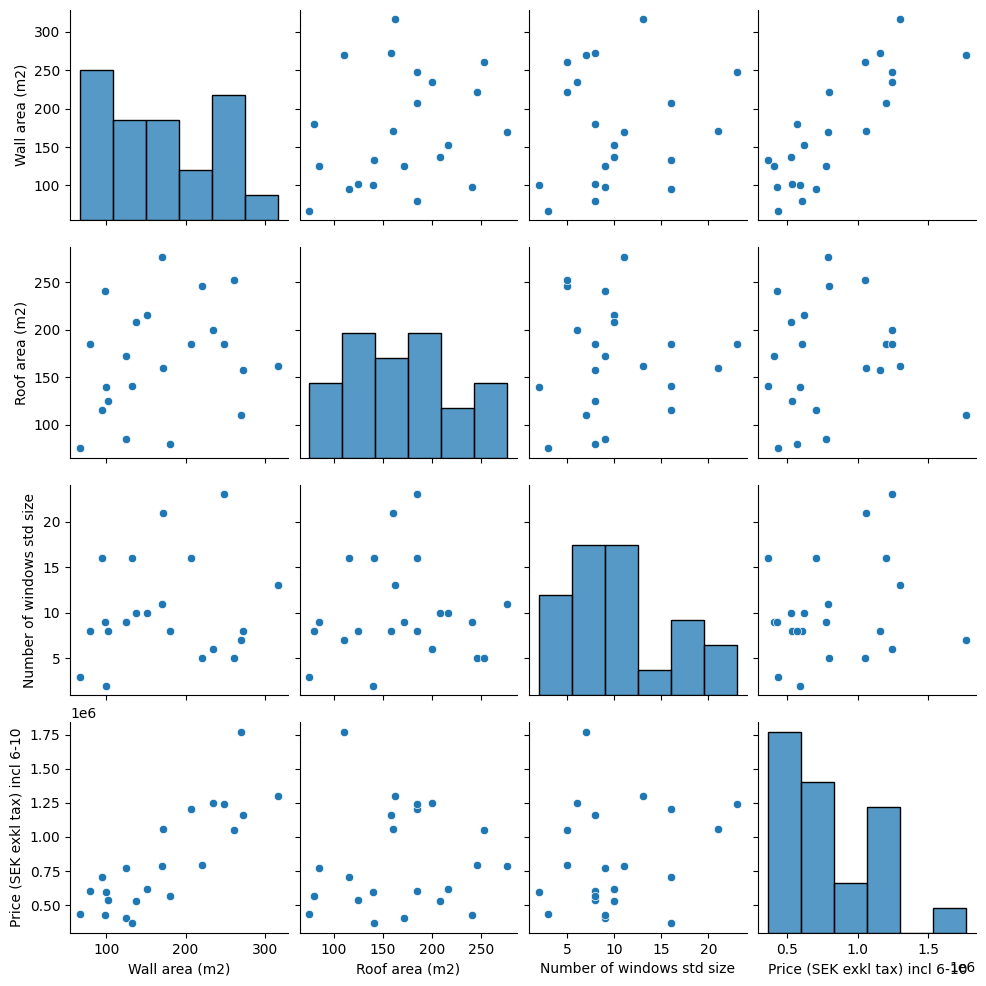

In [5]:
selected_features = ['Wall area (m2)', 'Roof area (m2)', 'Number of windows std size', 'Price (SEK exkl tax) incl 6-10']
sns.pairplot(df[selected_features])
plt.show()

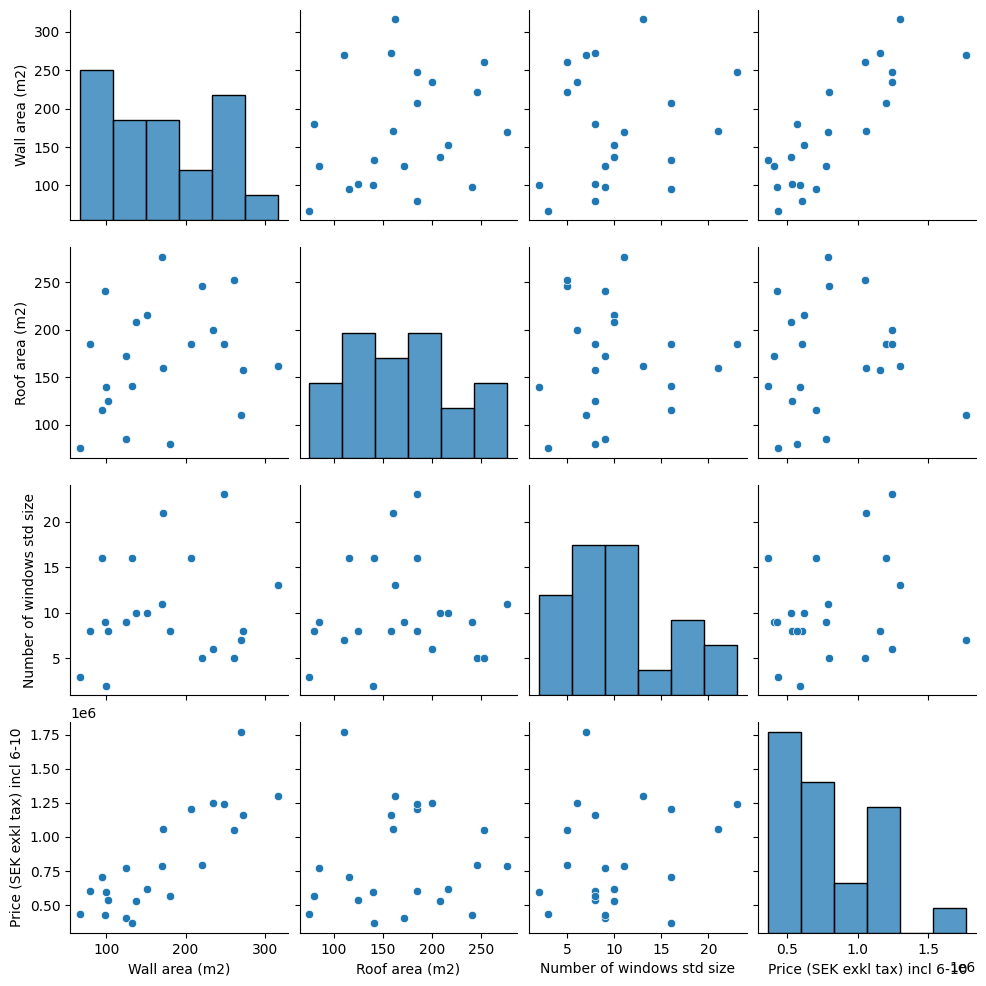

In [19]:
selected_features = ['Wall area (m2)', 'Roof area (m2)', 'Number of windows std size', 'Price (SEK exkl tax) incl 6-10']
numeric_features = [col for col in selected_features if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
if numeric_features:
    sns.pairplot(df[numeric_features])
    plt.show()
else:
    print("No numeric features available for pairplot.")